# **Find Trending YouTube Videos Through K-Means Clustering**
## **By Johan Fortus**

## **Import Libraries**

In [5]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

## **User Input**
#### Looking for videos that have the following attributes:
- Published between November 25 2024 - November 30 2024
- Country is Spain
- Has mid-to-high engagement:
  
<img src="https://i.imgur.com/tkCON9O.png" alt="drawing" width="500"/>

### This Python dictionary reflects the inputs shown in the form above, including the selected date range, country, and engagement level

In [6]:
simulated_data = {
    'searchType': 'k-means',
    'dateRange': {'start': '2024-11-25', 'end': '2024-11-30'},
    'country': 'Spain',
    'engagement': '72',
    'tags': []
}

start_date = simulated_data['dateRange']['start']
end_date = simulated_data['dateRange']['end']
country = simulated_data['country']
engagement = simulated_data['engagement']

print(f'Start Date: {start_date}')
print(f'End Date: {end_date}')
print(f'Country: {country}')
print(f'Engagement: {engagement}')

Start Date: 2024-11-25
End Date: 2024-11-30
Country: Spain
Engagement: 72


## **Engagement Levels**
### The engagement slider is a range input that allows users to adjust values between 0 and 100.
<img src="https://i.imgur.com/cMWFBoH.png" alt="drawing" width="500"/>

## **Engagement Rate Calculation**
## The following formula is used to calculate the engagement rate:
## $$\frac{(Likes + Comments)}{\text{Views}} \times 100$$
### The slider value is used to determine the percentage category of engagement: high, medium, or low
#### High Engagement (above 5%): 67 - 100
#### Medium Engagement (between 2% and 5%): 33 - 66
#### Low Engagement (between 0% and 2%): 0 - 32

## **New Dataframe**
### Below is a function that passes in a dataframe and returns a new one based on the user's search attribute inputs:


In [7]:
def new_df(df, start_date, end_date, country, engagement):
    
    df_filtered = df[(df['publish_date'] >= start_date) & (df['publish_date'] <= end_date) & (df['country'] == 'ES')]
    
    df_filtered = df_filtered.copy()
    df_filtered['engagement_rate'] = ((df_filtered['like_count'] + df_filtered['comment_count']) / df_filtered['view_count']) * 100

    return df_filtered

### The new dataframe that includes videos published between 2024-11-25 and 2024-11-30, in Spain, and has a new engagement rate column:

In [8]:
df = pd.read_csv('/kaggle/input/trending-youtube-videos-113-countries/trending_yt_videos_113_countries.csv')

df_filtered = new_df(df, start_date, end_date, country, engagement)
df_filtered

,title,channel_name,daily_rank,daily_movement,weekly_movement,snapshot_date,country,view_count,like_count,comment_count,description,thumbnail_url,video_id,channel_id,video_tags,kind,publish_date,langauge,engagement_rate
21130,Los MEJORES SUPLEMENTOS en MENOPAUSIA #shorts ...,Upeka by Aegon,47,-12,3,2024-12-07,ES,90319,0,40,NaN,https://i.ytimg.com/vi/eqHUOIWhPEU/mqdefault.jpg,eqHUOIWhPEU,UCt2qSTpXtQ6LCvRSB2Bshcw,NaN,youtube#video,2024-11-29 00:00:00+00:00,NaN,0.044287
26760,Los MEJORES SUPLEMENTOS en MENOPAUSIA #shorts ...,Upeka by Aegon,35,15,15,2024-12-06,ES,65834,0,30,NaN,https://i.ytimg.com/vi/eqHUOIWhPEU/mqdefault.jpg,eqHUOIWhPEU,UCt2qSTpXtQ6LCvRSB2Bshcw,NaN,youtube#video,2024-11-29 00:00:00+00:00,NaN,0.045569
26765,QUE NADIE TE DIGA QUE NO PUEDES,Shifer,40,-27,10,2024-12-06,ES,7122909,0,2001,NaN,https://i.ytimg.com/vi/GzVGQKzO4qs/mqdefault.jpg,GzVGQKzO4qs,UCPQDsaNBH6mIfwMusSqsgTQ,NaN,youtube#video,2024-11-29 00:00:00+00:00,es,0.028092
26769,How to make a cool craft. DIY screwdriver flex...,Tips Workshop,44,-23,6,2024-12-06,ES,2953078,39322,127,How to make a cool craft. DIY screwdriver flex...,https://i.ytimg.com/vi/F7WKeF1sQm0/mqdefault.jpg,F7WKeF1sQm0,UC9yZkmteI0_1cprtkSar45A,NaN,youtube#video,2024-11-28 00:00:00+00:00,en,1.335860
32403,QUE NADIE TE DIGA QUE NO PUEDES,Shifer,30,-17,20,2024-12-05,ES,5555068,0,1740,NaN,https://i.ytimg.com/vi/GzVGQKzO4qs/mqdefault.jpg,GzVGQKzO4qs,UCPQDsaNBH6mIfwMusSqsgTQ,NaN,youtube#video,2024-11-29 00:00:00+00:00,es,0.031323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83156,VOLANDO MI GENTE,DaniRep | +6 Vídeos Diarios De GTA 5 Online!,25,25,25,2024-11-26,ES,244322,19645,41,"Nuevo video de GTA V Online , deja un like si ...",https://i.ytimg.com/vi/KupkTguF_YI/mqdefault.jpg,KupkTguF_YI,UCHIwQiZhIn6fm5b_IilqBbQ,"danirep, gta v, gta 5 online, mega rampa, carr...",youtube#video,2024-11-25 00:00:00+00:00,NaN,8.057400
83157,بنت الشينوية خارجة مصدومة بعد رفض المحامين الت...,ChoufTV Live,26,24,24,2024-11-26,ES,431912,5237,2464,عاجل ومباشرة من البيضاء:بنت الشينوية خارجة مصد...,https://i.ytimg.com/vi/61OUhZczWk8/mqdefault.jpg,61OUhZczWk8,UCfnCCPHhYZS8SlWiUMI5LHg,"chouftv live, chouftvlive, chouf tv live, chou...",youtube#video,2024-11-25 00:00:00+00:00,ar,1.783002
83162,"Monólogo de Alsina: ""Menos bromas con Anacleto""",Onda Cero,31,19,19,2024-11-26,ES,176990,8648,566,Carlos Alsina reflexiona en su monólogo sobre ...,https://i.ytimg.com/vi/LbfDzLSiHBQ/mqdefault.jpg,LbfDzLSiHBQ,UCPd-Lf5gQkAJD5XdTmT_GGA,"Carlos Alsina, Corrupción, Monólogo de Carlos ...",youtube#video,2024-11-25 00:00:00+00:00,es,5.205944
88789,Pokémon Blanco MEGALOCKE Ep.8 - FINAL DE SERIE...,Folagor03,26,24,24,2024-11-25,ES,153946,7461,38,ENLACE DEL SERVER MUINDO PIXELGOR: https://dis...,https://i.ytimg.com/vi/ZR6N3dfVbaM/mqdefault.jpg,ZR6N3dfVbaM,UCYcdw2wL6W6iGBKZgGK_Hjw,"fola, folagor, folagor03, pokemon, dedsafio, r...",youtube#video,2024-11-25 00:00:00+00:00,es,4.871189


### Since the user selected an engagement of 72, the dataframe should only show videos with high engagement rate (above 5%)
### Filter out videos with an engagement rate above 5:

In [9]:
def calc_engagement_rate(engagement):
    engagement = int(engagement)
    if engagement >= 67:
        return 'High'
    elif engagement >= 66 and engagement <= 33:
        return 'Moderate'
    elif engagement >= 0 and engagement <= 32:
        return 'Low'
    return engagement

user_engagement_rate = calc_engagement_rate(engagement)

if user_engagement_rate == 'High':
    df_filtered = df_filtered[df_filtered['engagement_rate'] > 5]
elif user_engagement_rate == 'Moderate':
    df_filtered = df_filtered[(df_filtered['engagement_rate'] > 2) & (df_filtered['engagement_rate'] < 5)]
elif user_engagement_rate == 'Low':
    df_filtered = df_filtered[df_filtered['engagement_rate'] < 2]

df_filtered

,title,channel_name,daily_rank,daily_movement,weekly_movement,snapshot_date,country,view_count,like_count,comment_count,description,thumbnail_url,video_id,channel_id,video_tags,kind,publish_date,langauge,engagement_rate
38066,Los cursos de francotirador 🪖 #tengounplan,Tengo un Plan,43,-22,7,2024-12-04,ES,1375255,84908,376,NaN,https://i.ytimg.com/vi/BxVbOVxP15s/mqdefault.jpg,BxVbOVxP15s,UCJFP-5V2-0BFeVmKifG0H_Q,NaN,youtube#video,2024-11-28 00:00:00+00:00,NaN,6.201323
43690,Los cursos de francotirador 🪖 #tengounplan,Tengo un Plan,21,-6,29,2024-12-03,ES,1128663,72004,329,NaN,https://i.ytimg.com/vi/BxVbOVxP15s/mqdefault.jpg,BxVbOVxP15s,UCJFP-5V2-0BFeVmKifG0H_Q,NaN,youtube#video,2024-11-28 00:00:00+00:00,NaN,6.408733
43692,SUBIENDO AL INFIERNO | EL CAMINO #2,Ibai,23,-7,27,2024-12-03,ES,2223345,126087,3399,MI CANAL DE DIRECTOS: https://www.youtube.com/...,https://i.ytimg.com/vi/apoJ4JNEh-A/mqdefault.jpg,apoJ4JNEh-A,UCaY_-ksFSQtTGk0y1HA_3YQ,"ibai, ibai llanos, reaccionando Ibai, Ibai rea...",youtube#video,2024-11-29 00:00:00+00:00,es,5.823927
43709,El balón BOTANDO en el ÁREA… 😔,Luca Nivio,40,-2,10,2024-12-03,ES,395886,28106,84,NaN,https://i.ytimg.com/vi/3zo91FakVsQ/mqdefault.jpg,3zo91FakVsQ,UCspkpETCmq6YeCh-2N0ZYOg,"fútbol, videos de fútbol, luca nivio, santi to...",youtube#video,2024-11-27 00:00:00+00:00,NaN,7.120737
43714,"Lola Indigo, Paulo Londra - PERREITO PA LLORAR...",LolaIndigoVEVO,45,-8,5,2024-12-03,ES,859664,53314,1737,"PERREITO PA LLORAR, ya disponible para descarg...",https://i.ytimg.com/vi/TufBDEhRXmg/mqdefault.jpg,TufBDEhRXmg,UCGSN_cIgIcBYZhumot7LXhg,"Lola Indigo, Paulo Londra, Latin Pop, Lola Ind...",youtube#video,2024-11-28 00:00:00+00:00,es,6.403781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83132,¿Por qué España no conquistó Portugal?,El Escoces gamer,1,49,49,2024-11-26,ES,283975,43037,559,NaN,https://i.ytimg.com/vi/rf2chJmd9Yc/mqdefault.jpg,rf2chJmd9Yc,UC15QE9U_c5QZd1qKP57_hMA,NaN,youtube#video,2024-11-25 00:00:00+00:00,es,15.352056
83136,El primer perro al que le tiraron un palo🐕 #sh...,Jonata 26,5,45,45,2024-11-26,ES,101926,9353,20,NaN,https://i.ytimg.com/vi/P5EvJpr0nQA/mqdefault.jpg,P5EvJpr0nQA,UCsTqkTJj8LB32pdNiyepFUQ,NaN,youtube#video,2024-11-25 00:00:00+00:00,NaN,9.195887
83150,💀 ¡Ganando Solo con Escopeta de Carga! 💀 ~ For...,LOLiTO FDEZ,19,31,31,2024-11-26,ES,195647,36679,2298,Visita la tienda de Fortnite desde cualquier d...,https://i.ytimg.com/vi/82lT0BuaPYk/mqdefault.jpg,82lT0BuaPYk,UC7QiWlK7a7RePg3krLeBK0w,"Lolito, Lolitofdez, fortnite, challenge, reto,...",youtube#video,2024-11-25 00:00:00+00:00,es,19.922105
83156,VOLANDO MI GENTE,DaniRep | +6 Vídeos Diarios De GTA 5 Online!,25,25,25,2024-11-26,ES,244322,19645,41,"Nuevo video de GTA V Online , deja un like si ...",https://i.ytimg.com/vi/KupkTguF_YI/mqdefault.jpg,KupkTguF_YI,UCHIwQiZhIn6fm5b_IilqBbQ,"danirep, gta v, gta 5 online, mega rampa, carr...",youtube#video,2024-11-25 00:00:00+00:00,NaN,8.057400


## **K-Means Algorithm**
### Step 1. Clean up the dataframe

In [10]:
df_filtered = df_filtered.copy()
df_filtered.dropna(subset=['view_count', 'like_count', 'comment_count'], inplace=True)
df_filtered.drop_duplicates(subset="title", keep="first", inplace=True)
df_filtered

,title,channel_name,daily_rank,daily_movement,weekly_movement,snapshot_date,country,view_count,like_count,comment_count,description,thumbnail_url,video_id,channel_id,video_tags,kind,publish_date,langauge,engagement_rate
38066,Los cursos de francotirador 🪖 #tengounplan,Tengo un Plan,43,-22,7,2024-12-04,ES,1375255,84908,376,NaN,https://i.ytimg.com/vi/BxVbOVxP15s/mqdefault.jpg,BxVbOVxP15s,UCJFP-5V2-0BFeVmKifG0H_Q,NaN,youtube#video,2024-11-28 00:00:00+00:00,NaN,6.201323
43692,SUBIENDO AL INFIERNO | EL CAMINO #2,Ibai,23,-7,27,2024-12-03,ES,2223345,126087,3399,MI CANAL DE DIRECTOS: https://www.youtube.com/...,https://i.ytimg.com/vi/apoJ4JNEh-A/mqdefault.jpg,apoJ4JNEh-A,UCaY_-ksFSQtTGk0y1HA_3YQ,"ibai, ibai llanos, reaccionando Ibai, Ibai rea...",youtube#video,2024-11-29 00:00:00+00:00,es,5.823927
43709,El balón BOTANDO en el ÁREA… 😔,Luca Nivio,40,-2,10,2024-12-03,ES,395886,28106,84,NaN,https://i.ytimg.com/vi/3zo91FakVsQ/mqdefault.jpg,3zo91FakVsQ,UCspkpETCmq6YeCh-2N0ZYOg,"fútbol, videos de fútbol, luca nivio, santi to...",youtube#video,2024-11-27 00:00:00+00:00,NaN,7.120737
43714,"Lola Indigo, Paulo Londra - PERREITO PA LLORAR...",LolaIndigoVEVO,45,-8,5,2024-12-03,ES,859664,53314,1737,"PERREITO PA LLORAR, ya disponible para descarg...",https://i.ytimg.com/vi/TufBDEhRXmg/mqdefault.jpg,TufBDEhRXmg,UCGSN_cIgIcBYZhumot7LXhg,"Lola Indigo, Paulo Londra, Latin Pop, Lola Ind...",youtube#video,2024-11-28 00:00:00+00:00,es,6.403781
43716,Este Carterista Está Apunto De Robar Un Móvil ...,BCN A PIE DE CALLE,47,-16,3,2024-12-03,ES,997254,54013,1628,NaN,https://i.ytimg.com/vi/SlDBtl3k_eI/mqdefault.jpg,SlDBtl3k_eI,UCUvcm4EhEyDqjI8CERo5_eA,NaN,youtube#video,2024-11-28 00:00:00+00:00,es-ES,5.579421
49347,Ningún juego te hará REFLEXIONAR como ORCHIDS ...,Vandal,33,-20,17,2024-12-02,ES,2014400,192641,415,NaN,https://i.ytimg.com/vi/uNfdjvYjw7w/mqdefault.jpg,uNfdjvYjw7w,UCmb0LnmFYceH7toqgmUTJDA,NaN,youtube#video,2024-11-29 00:00:00+00:00,es,9.583797
49356,Pasta strainer HACK APPROVED,Lionfield,42,-36,8,2024-12-02,ES,24257990,1637286,4990,NaN,https://i.ytimg.com/vi/8QGvRpSQkUc/mqdefault.jpg,8QGvRpSQkUc,UCHwpDpLoyJgtFXoAaaSut4Q,NaN,youtube#video,2024-11-27 00:00:00+00:00,en-US,6.770042
49357,Kidd Keo x ElRubiusOMG x Yay - Don´t Know Sh*t...,Kidd Keo,43,-18,7,2024-12-02,ES,475622,54085,1587,Rockport Espacial 3\nhttps://m.youtube.com/wat...,https://i.ytimg.com/vi/lVJ0oj0JSw0/mqdefault.jpg,lVJ0oj0JSw0,UCBCD1nIuiH-d10_l6Q-8rRg,"Kidd Keo, KiddKeo, Keo, Kidd Keo Dracukeo, Kid...",youtube#video,2024-11-28 00:00:00+00:00,es,11.705094
49358,"SI DIGO TU NOMBRE, PIERDES!!",JuegaGerman,44,-20,6,2024-12-02,ES,2585380,250284,24499,NaN,https://i.ytimg.com/vi/QA_rLJkF-Vc/mqdefault.jpg,QA_rLJkF-Vc,UCYiGq8XF7YQD00x7wAd62Zg,NaN,youtube#video,2024-11-28 00:00:00+00:00,es-419,10.628341
49359,HELLUVA BOSS - MASTERMIND // S2: Episode 11,Vivziepop,45,-41,5,2024-12-02,ES,8204976,723079,64685,Blitz hires some interns and things sure do ha...,https://i.ytimg.com/vi/IoVB5Hn2m_k/mqdefault.jpg,IoVB5Hn2m_k,UCzfyYtgvkx5mLy8nlLlayYg,"Vivziepop, Zoophobia",youtube#video,2024-11-29 00:00:00+00:00,en,9.601052


### Step 2. Apply a standard scaler

In [11]:
scaler = StandardScaler()
# df_filtered[['view_count_T', 'like_count_T', 'comment_count_T']] = scaler.fit_transform(df_filtered[['view_count', 'like_count', 'comment_count']])
# df_filtered

df_filtered['view_count_log'] = np.log1p(df_filtered['view_count'])
df_filtered['like_count_log'] = np.log1p(df_filtered['like_count'])
df_filtered['comment_count_log'] = np.log1p(df_filtered['comment_count'])
df_filtered['engagement_rate_log'] = np.log1p(df_filtered['engagement_rate'])
df_filtered[['view_count_T', 'like_count_T', 'comment_count_T', 'engagement_rate_T']] = scaler.fit_transform(df_filtered[['view_count_log', 'like_count_log', 'comment_count_log', 'engagement_rate_log']])
df_filtered

,title,channel_name,daily_rank,daily_movement,weekly_movement,snapshot_date,country,view_count,like_count,comment_count,...,langauge,engagement_rate,view_count_log,like_count_log,comment_count_log,engagement_rate_log,view_count_T,like_count_T,comment_count_T,engagement_rate_T
38066,Los cursos de francotirador 🪖 #tengounplan,Tengo un Plan,43,-22,7,2024-12-04,ES,1375255,84908,376,...,NaN,6.201323,14.134150,11.349335,5.932245,1.974265,0.558088,0.438723,-0.288786,-0.714868
43692,SUBIENDO AL INFIERNO | EL CAMINO #2,Ibai,23,-7,27,2024-12-03,ES,2223345,126087,3399,...,es,5.823927,14.614524,11.744735,8.131531,1.920435,0.854799,0.677636,0.979179,-0.919752
43709,El balón BOTANDO en el ÁREA… 😔,Luca Nivio,40,-2,10,2024-12-03,ES,395886,28106,84,...,NaN,7.120737,12.888884,10.243774,4.442651,2.094421,-0.211073,-0.229292,-1.147588,-0.257534
43714,"Lola Indigo, Paulo Londra - PERREITO PA LLORAR...",LolaIndigoVEVO,45,-8,5,2024-12-03,ES,859664,53314,1737,...,es,6.403781,13.664298,10.883973,7.460490,2.001991,0.267875,0.157536,0.592301,-0.609338
43716,Este Carterista Está Apunto De Robar Un Móvil ...,BCN A PIE DE CALLE,47,-16,3,2024-12-03,ES,997254,54013,1628,...,es-ES,5.579421,13.812762,10.896999,7.395722,1.883947,0.359577,0.165407,0.554959,-1.058633
49347,Ningún juego te hará REFLEXIONAR como ORCHIDS ...,Vandal,33,-20,17,2024-12-02,ES,2014400,192641,415,...,es,9.583797,14.515832,12.168589,6.030685,2.359324,0.793841,0.933741,-0.232032,0.750731
49356,Pasta strainer HACK APPROVED,Lionfield,42,-36,8,2024-12-02,ES,24257990,1637286,4990,...,en-US,6.770042,17.004257,14.308551,8.515392,2.050276,2.330861,2.226772,1.200488,-0.425559
49357,Kidd Keo x ElRubiusOMG x Yay - Don´t Know Sh*t...,Kidd Keo,43,-18,7,2024-12-02,ES,475622,54085,1587,...,es,11.705094,13.072381,10.898331,7.370231,2.542003,-0.097733,0.166212,0.540263,1.446036
49358,"SI DIGO TU NOMBRE, PIERDES!!",JuegaGerman,44,-20,6,2024-12-02,ES,2585380,250284,24499,...,es-419,10.628341,14.765383,12.430356,10.106428,2.453445,0.947981,1.091908,2.117776,1.108971
49359,HELLUVA BOSS - MASTERMIND // S2: Episode 11,Vivziepop,45,-41,5,2024-12-02,ES,8204976,723079,64685,...,en,9.601052,15.920251,13.491275,11.077300,2.360953,1.661306,1.732949,2.677517,0.756931


### Step 3. Find out how many clusters

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

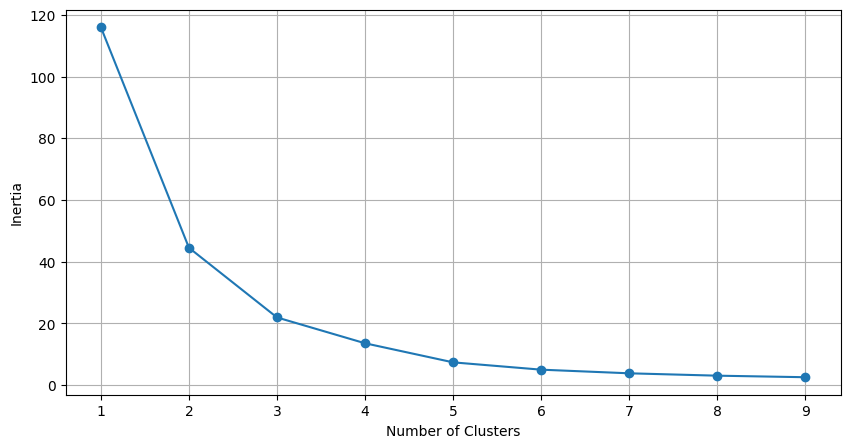

In [12]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    # Generate the elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

optimise_k_means(df_filtered[['view_count_T', 'like_count_T']], 10)

### Step 4. Apply K-Means

In [13]:
kmeans = KMeans(n_clusters=3)
# kmeans.fit(df_filtered[['view_count_T', 'like_count_T']])
kmeans.fit(df_filtered[['view_count_T', 'like_count_T', 'comment_count_T', 'engagement_rate_T']])

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

### Step 5. Plot Data

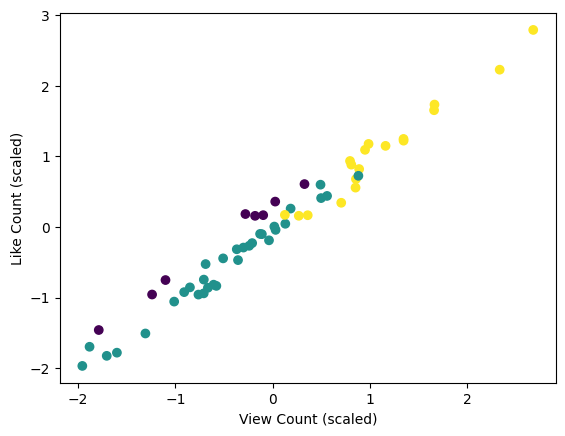

In [16]:
df_filtered['kmeans_3'] = kmeans.labels_

plt.scatter(x=df_filtered['view_count_T'], y=df_filtered['like_count_T'], c=df_filtered['kmeans_3'])
plt.xlabel('View Count (scaled)')
plt.ylabel('Like Count (scaled)')
plt.show()